In [ ]:
#if you would like to explore oversampling for class imbalance
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 


In [1]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import os

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')


C:\Users\ianre\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Custom functions required as part of demonstration

more_stopwords=["root","editorial","added","though","father","mother","keywords","sourcedate","location","really","review","title","total","ranking","brief","summary","count","would","could","place","ordered","staff","service","experience","private","court","all", "due", "to", "on", "daily","every","really","never","first","story","movie","character","film","another",
                     "trier","house","auidence","reaction","inside","emotion","little","would","could","something","built","argument",
                     "audience","world","scene","still","performance","director","sequence","attempt","actually","least","subject",
    "play","franchise","advance","scene","third","moment","nothing","grown","kathy","going","moment","across","street","almost","planet","notre","thing","effect","think" ,"make","people","matter","tell","played","together","year","might","thing"
,"feature","effect","sound","great","come","seems","played","point","without","child","father","young","friend","fischer",
   "wingard","saito","forrest","strip","irvin","kershner","favorite" ,"george","rudger","looked","advanced","basically",
   "friend","forrest","young","detail","spielberg","abrams" ,"becomes","jones","school","clear","often","taken","likely",
"schindlers","riley","heather","original","cannes","critic","reference","becomes","seek","merit",
"inception","though","result","ending","mission","human","nolan","legacy","williams","directed",
"schmidt","creating","seven","kambei","enough","piece","keeping","trying","instead","didnt","realize","unlike","quality", 
"deeper","nolans","figure","mile","theme","serial","merely","personal","sometimes","feel","truly","remembered","considered",
"andrew","moving","appreciation","target","deliver","peter","whose", "impossible","couldnt","course",
"image","doesnt","want","thats","given","latest","pratt","generic","limbo","layer","pixar","screen"
"jenko","nichols","work","benny","culture","white","genre","johnny","picture","claire","cameron","justine",
"miller","three","selma","bjork","claire","start","nichols","morpheus","trinity","completely","marketing","value","rating","robert","return",
"brother","batman","gladstone","cinema","godzilla","garfield","chris","arbuckle","vader","darth",
"skywalker","created","whatever","blair","caleb","william","egger","screen","jenko","tatum","narrative","established",
"sense","behind","parent","spiderverse","turn","quite","schindler","color","within","following","spoiler",
"motion","right","wikus","everything","question","district","michael","cronin","often","despite","brought","second",
"turn","recent","reason","watch","different","spiderman","become","group","rather","around","excellent","later","quiet","take",
"throughout","try","yoshiaki","hardy","level","monsterverse","titan","caesar","simian","orangutan","kevin","kurosawa",
"tatum","project","footage","score","ennui","watcher","color","experience","actor","element","early",
"starks","voiced","dogville","woman","filmmaker","center","feeling","place","allowing","wanted","style","design","look","jonah",
 "behavior","terminator","belfort","nomination","screenplay","maybe","playing","mario","sense","coppola","corleone",
 "frank","reservation","niece","taking","prelude","conceived","probably","since","considering",
"amanda","particularly","noise","including","sequel","found","focus","premise","meant", "simply","writer",
 "somehow","similar","person","visually","recall","class","neither","person","already","husband","close","slowly","sudden","helen","viewing","event","effort","individual","chapter","trilogy","member","mother","called","opening",
"lucas","special","festival","couple","attention","anyone","personality","begin","local","small","making","others",
 "worth","therefore","seeing","always","coming","hour","wasnt","named","example","anything","thought",
"acting","eventually","expect","fremen","expecting","instance","debate","provide","script","kubrick","bring","teddy",
"follwed","transformer","genuinely","someone","production","acting","dewanda","standing","title","show","unlikely",
"mccartney","entirely","looking","youve","black","heard","theater","earlier","retrieve","along",
                    "jessica","chauncey","follwed","issue","review","producer","direct","harkonnen","organon","series",
                    "cannot","indeed","viewer","along","middle","string","explain","clearly","absolutely","perfectly","strangely","middle"]
    
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

def clean_doc(doc): 
    doc = doc.replace("<NL>"," ")
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    lem = WordNetLemmatizer()
    tokens_lem =[lem.lemmatize(w) for w in tokens]
    # filter out stop words
    swl=stopwords.words('english')
    swl.extend(more_stopwords)
    stop_words = set(swl)
    tokens = [w for w in tokens_lem if not w in stop_words]   
    return tokens

def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

def tfidf(corpus, titles, ngram_range = (1,1), labels=None):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range=(1,1))

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names_out()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names_out(), index=titles)
    return matrix


def One_Hot(variable):
    #this is a function to one hot encode the classes
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels



In [3]:
#Section 1: K-Means
def k_means(titles, tfidf_matrix, k):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    #Returns dataframe indicating cluster number per document

    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])
    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            title=title.replace(".txt","")
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list

    print(cluster_title)
    return cluster_title,clusters,frame



In [21]:
#mcolors.XKCD_COLORS

In [4]:
import matplotlib.colors as mcolors
def plot_tfidf_matrix(cluster_title,clusters,TFIDF_matrix):
    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    

    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

    dist = 1 - cosine_similarity(TFIDF_matrix)

    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

    xs, ys = pos[:, 0], pos[:, 1]


    #set up colors per clusters using a dict.  number of colors must correspond to K


    cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange', 4: 'yellow', 
                      5:'#bffe28', 6:'pink', 7:'purple',8:'grey',9:'black',10:'cyan',11:'magenta',12:'brown',13:'#d4ffff',
                     14:'#017374',15:'#d3b683',16:'#4f738e'}


    #set up cluster names using a dict.  
    cluster_dict=cluster_title

    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

    #group by cluster
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(5,5)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
                label=cluster_dict[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='on')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='on')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})      #show legend with only 1 point



In [170]:
#Section 3, 4, 5: Classifiers
def classifiers(x, y, model_type, cv = 3):
    
    #this function is to fit 3 different model scenarios.  Support vector machines, logistic regressions, naive bayes.
    #svm = Support vector machin
    #logistic = Logistic regression
    #naive_bayes = Naive Bayes Multinomial
    
    #can define cv value for cross validation.
    
    #function returns the train test split scores of each model.
    
    if model_type == 'svm':
        print("svm")
        model = SVC()

    elif model_type == 'logistic':
        print("logistic")
        model = LogisticRegression()

    elif model_type == 'naive_bayes':
        print("naive_bayes")
        model = MultinomialNB()
    
    #change the test set size 
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    
    #NOTE THIS IS AN OVERFIT CASE SO YOU KNOW THAT IT IS WORKING
    #ONCE YOU GET CLOSE TO 100% ACCURACY THEN COMMENT OUT THESE TWO LINES
    #predictions = model.predict(X_train)
    #accy = accuracy_score(y_train, predictions)
    
    #NOTE THIS IS THE CORRECT WAY TO TEST YOUR CLASSIFIERS
    #UNCOMMENT THESE TWO LINES ONCE THE OVERFIT CASE YIELDS CLOSE TO 100% ACCURACY
    predictions = model.predict(X_test)
    accy = accuracy_score(y_test, predictions)

    # Check the results using metrics
    from sklearn import metrics
    cm=metrics.confusion_matrix(predictions, y_test)
    import seaborn as sns
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    return accy

In [160]:
#this section of the code prepares the required variables to run functions set for each 
#section of code

    
#read in class corpus csv into python
data=pd.read_csv('trip_advisor_reviews_large.csv')
#data=pd.read_csv(r'movie_reviews_small.csv')

#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['review'].apply(lambda x: clean_doc(x))


#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['file_name'].tolist()

processed_text = data['processed_text'].tolist()


#generate tfidf for analysis
tfidf_matrix = tfidf(final_processed_text, titles,ngram_range = (1,2))

In [168]:
# Section 1: Execute K-means clustering
cluster_title,clusters,k_means_df = k_means(titles, tfidf_matrix, k=5)

#labels used for supervised learning
labels = k_means_df['Cluster']

In [179]:
# Convert list to pandas Series
series = pd.Series(labels)

# Display the distribution
distribution = series.value_counts()
display(distribution)

Cluster
2    129
4    114
3     80
1     73
0     51
Name: count, dtype: int64

In [163]:
print(tfidf_matrix)

0.362962962962963

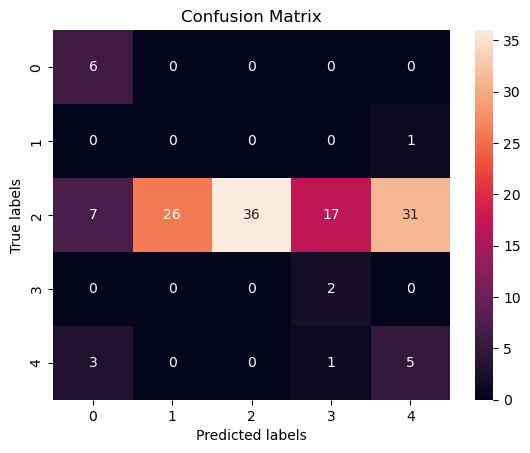

In [171]:
#Section 2: Support Vector Machines
#TF-IDF vs cluster labels
classifiers(tfidf_matrix, labels, 'svm')

0.43703703703703706

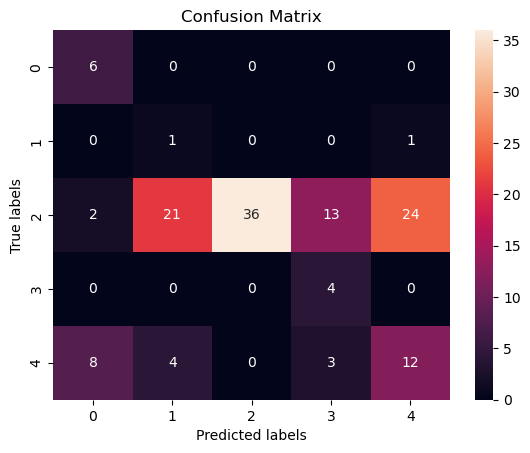

In [165]:
#Section 3: Logistic Regression
#TF-IDF vs cluster labels
classifiers(tfidf_matrix, labels, 'logistic')

0.34814814814814815

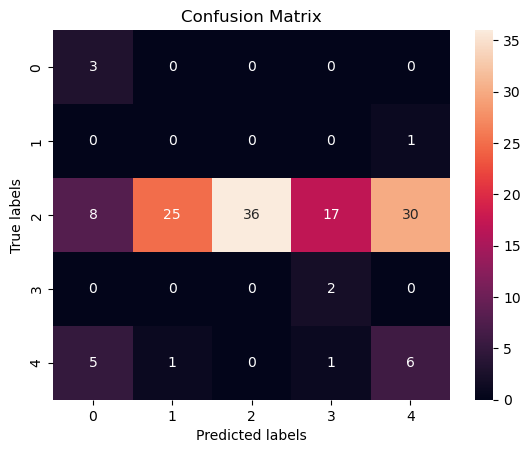

In [166]:
#Section 4: Naive Bayes
#TF-IDF vs cluster labels
classifiers(tfidf_matrix, labels, 'naive_bayes')

In [13]:
data.head(10)

,file_name,review,rating,review_type,processed_text
0,garcia_tripadvisor1_fortworth_stockyardsthings...,5 Exceeded all expectations what a fun histori...,5.0,things to do,"[exceeded, expectation, historic, block, eithe..."
1,garcia_tripadvisor2_fortworth_watergardenthing...,4 This place is at the southern end of the cor...,4.0,things to do,"[southern, downtown, business, visited, lived,..."
2,garcia_tripadvisor3_fortworth_zoothingstodo.docx,2 We just moved here and we were so interested...,2.0,things to do,"[moved, interested, rated, belief, animal, nat..."
3,garcia_tripadvisor4_fortworth_artmuseumthingst...,3 It is not a bad collection but know what to ...,3.0,things to do,"[collection, collection, includes, known, name..."
4,garcia_tripadvisor5_fortworth_sundancesquareth...,1 Unfortunately it appears the management of S...,1.0,things to do,"[unfortunately, appears, management, sundance,..."
5,Jiahao NOLA Hotel Review.rtf,5 Simply put there is really no comparison. Th...,5.0,hotel,"[comparison, windsor, facility, whole, enter, ..."
6,cmiel_tripadvisor1_boyntoncanyon_great.rtf,5 Incredible! It snow the night before we hike...,5.0,things to do,"[incredible, night, hiked, gorgeous, fortunate..."
7,cmiel_tripadvisor1_boyntoncanyon_okay.rtf,2 We drove to the Boynton Canyon trailhead and...,2.0,things to do,"[drove, boynton, canyon, trailhead, started, o..."
8,cmiel_tripadvisor1_brokenarrow_great.rtf,5 This hike from Broken Arrow TH is little kno...,5.0,things to do,"[broken, arrow, known, hiker, popular, jeep, r..."
9,cmiel_tripadvisor1_brokenarrow_okay.rtf,3 The trail is 1.7 miles one way from the park...,3.0,things to do,"[trail, parking, chicken, parking, trailhead, ..."


In [14]:
filenames_with_nan = data.loc[data['rating'].isna(), 'file_name']

In [15]:
tfidf_matrix = pd.DataFrame(tfidf_matrix)#, index=indices)
tfidf_matrix.head(10)

,abounds,abovethe,absent,absolute,absolutey,absolutly,abundance,abundant,acceded,accept,...,youthe,youçéèe,yummy,ywood,zaandam,zapata,ziggurat,zipped,zishan,zoila
garcia_tripadvisor1_fortworth_stockyardsthingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
garcia_tripadvisor2_fortworth_watergardenthingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.130355,0.0,0.0,0.0
garcia_tripadvisor3_fortworth_zoothingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
garcia_tripadvisor4_fortworth_artmuseumthingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
garcia_tripadvisor5_fortworth_sundancesquarethingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Jiahao NOLA Hotel Review.rtf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
cmiel_tripadvisor1_boyntoncanyon_great.rtf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
cmiel_tripadvisor1_boyntoncanyon_okay.rtf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
cmiel_tripadvisor1_brokenarrow_great.rtf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
cmiel_tripadvisor1_brokenarrow_okay.rtf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [16]:
tfidf_matrix = tfidf_matrix.drop(filenames_with_nan)

In [17]:
data = data.dropna(subset=['rating'])
value_counts = data['review_type'].value_counts()
print(value_counts.sum())

442


In [18]:
#If you are working with the trip advisor dataset you could use the actual labels

#Now the labels are review type
real_labels = data['review_type'].tolist()

svm


0.9699248120300752

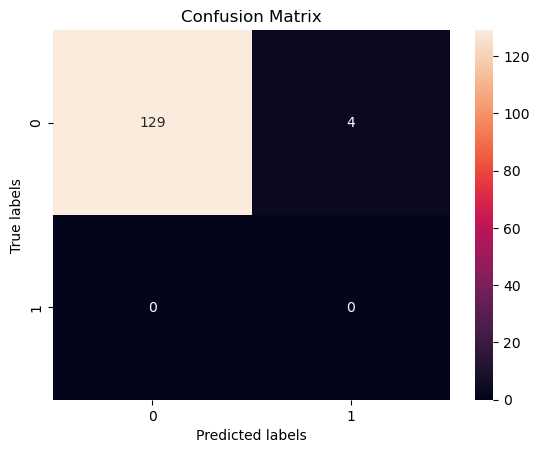

In [19]:
#real labels
#Section 2: Support Vector Machines
classifiers(tfidf_matrix, real_labels, 'svm')

logistic


0.9699248120300752

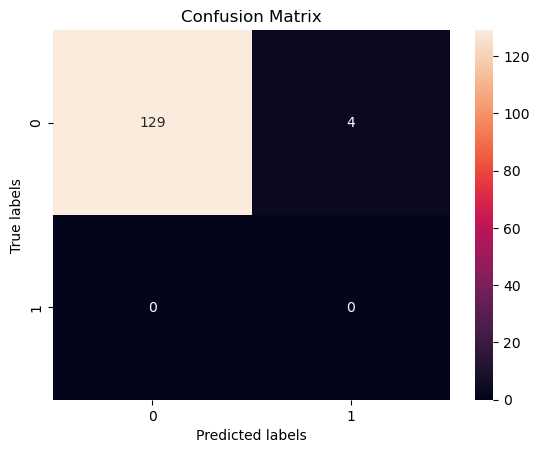

In [20]:
#Section 3: Logistic Regression
classifiers(tfidf_matrix, real_labels, 'logistic')

naive_bayes


0.9699248120300752

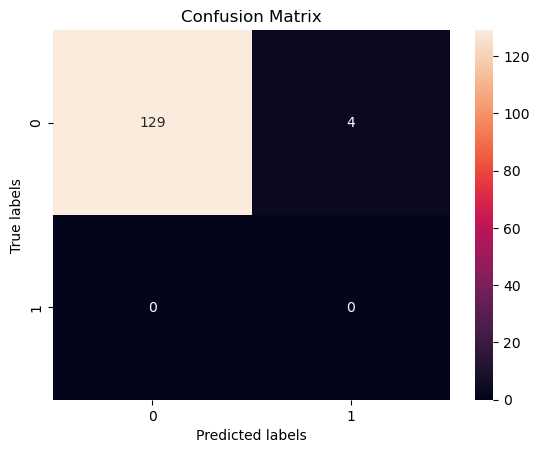

In [21]:
#Section 4: Naive Bayes
classifiers(tfidf_matrix, real_labels, 'naive_bayes')   

In [22]:
tfidf_matrix

,abounds,abovethe,absent,absolute,absolutey,absolutly,abundance,abundant,acceded,accept,...,youthe,youçéèe,yummy,ywood,zaandam,zapata,ziggurat,zipped,zishan,zoila
garcia_tripadvisor1_fortworth_stockyardsthingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
garcia_tripadvisor2_fortworth_watergardenthingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.130355,0.0,0.0,0.0
garcia_tripadvisor3_fortworth_zoothingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
garcia_tripadvisor4_fortworth_artmuseumthingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
garcia_tripadvisor5_fortworth_sundancesquarethingstodo.docx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trip advisor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
trip advisor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
trip advisor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
trip advisor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [23]:
#Change lables to ratings
real_labels2 = data['rating'].tolist()

In [118]:
display(real_labels2)

[5.0,
 4.0,
 2.0,
 3.0,
 1.0,
 5.0,
 5.0,
 2.0,
 5.0,
 3.0,
 4.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 5.0,
 4.0,
 3.0,
 2.0,
 1.0,
 5.0,
 5.0,
 3.0,
 4.0,
 1.0,
 4.0,
 1.0,
 4.0,
 5.0,
 3.0,
 5.0,
 5.0,
 2.0,
 2.0,
 4.0,
 5.0,
 4.0,
 5.0,
 1.0,
 1.0,
 3.0,
 4.0,
 3.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 5.0,
 5.0,
 5.0,
 1.0,
 5.0,
 3.0,
 1.0,
 4.0,
 4.0,
 4.0,
 5.0,
 2.0,
 4.0,
 5.0,
 5.0,
 1.0,
 4.0,
 5.0,
 3.0,
 4.0,
 5.0,
 2.0,
 5.0,
 5.0,
 4.0,
 4.0,
 3.0,
 5.0,
 5.0,
 2.0,
 1.0,
 5.0,
 5.0,
 2.0,
 4.0,
 1.0,
 4.0,
 1.0,
 2.0,
 5.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 1.0,
 5.0,
 5.0,
 4.0,
 4.0,
 5.0,
 3.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 5.0,
 4.0,
 4.0,
 5.0,
 2.0,
 2.0,
 5.0,
 1.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 3.0,
 4.0,
 5.0,
 5.0,
 2.0,
 5.0,
 3.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 1.0,
 4.0,
 4.0,
 5.0,
 3.0,
 1.0,
 5.0,
 3.0,
 4.0,
 4.0,
 3.0,
 3.0,
 5.0

svm


0.42105263157894735

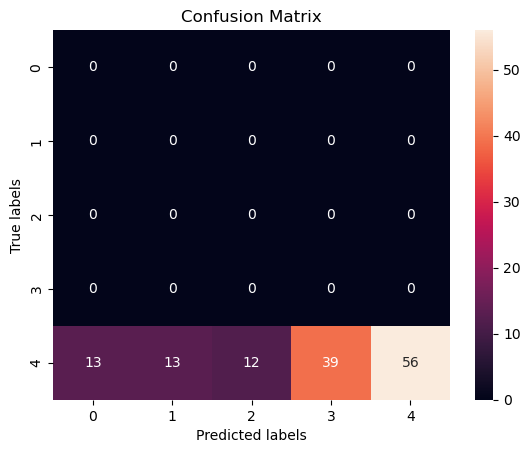

In [24]:
#SVM
classifiers(tfidf_matrix, real_labels2, 'svm')

logistic


0.42105263157894735

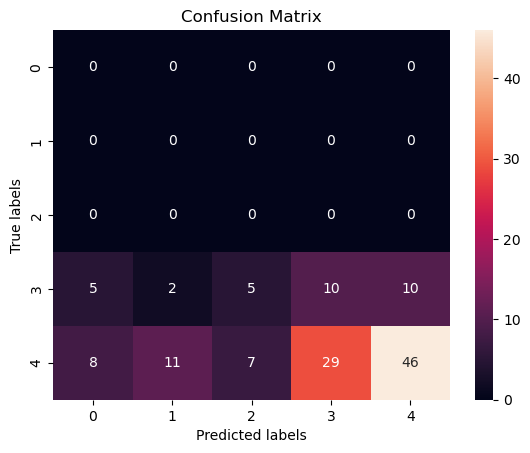

In [25]:
#Logistic Regression
classifiers(tfidf_matrix, real_labels2, 'logistic')

naive_bayes


0.43609022556390975

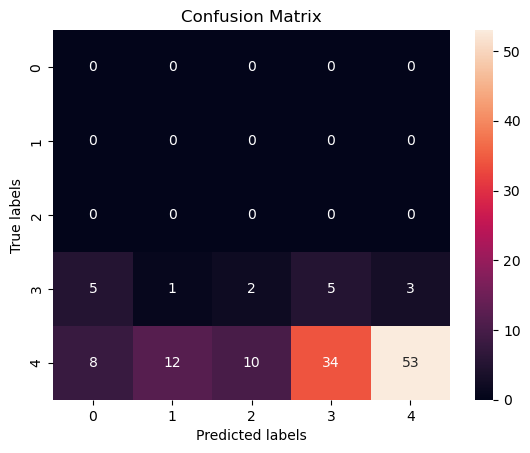

In [26]:
classifiers(tfidf_matrix, real_labels2, 'naive_bayes')

In [172]:
#Sentiment classification using binary classification
#Create a Sentiment column
def map_sentiment_distilbert(rating):
    if rating in [3,4,5]:
        return 1
    else:
        return 0

# Apply the function to create a new 'sentiment' column
sentiment_labels = data['rating'].apply(map_sentiment_distilbert)

In [173]:
display(sentiment_labels)

0      1
1      1
2      0
3      1
4      0
      ..
442    0
443    1
444    1
445    1
446    1
Name: rating, Length: 447, dtype: int64

0.7925925925925926

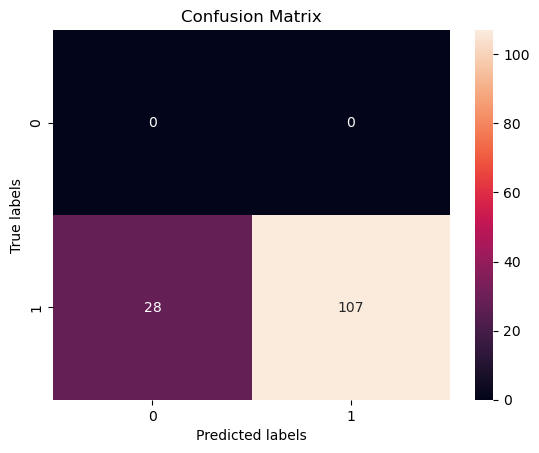

In [175]:
#SVM
classifiers(tfidf_matrix, sentiment_labels, 'svm')

0.7925925925925926

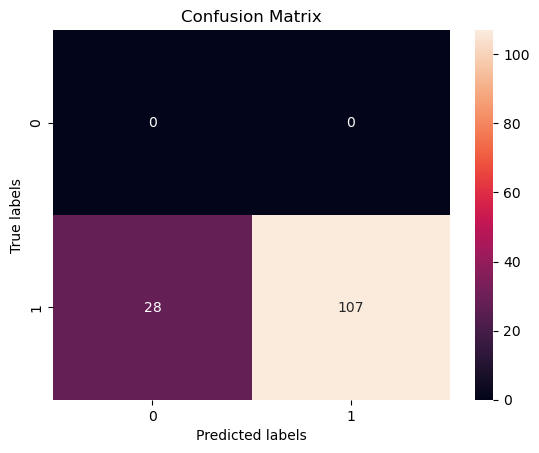

In [177]:
#Logistic Regression
classifiers(tfidf_matrix, sentiment_labels, 'logistic')

0.7925925925925926

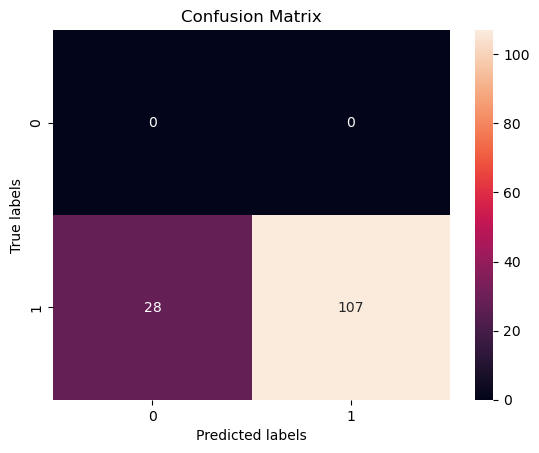

In [178]:
#Naive Bayes
classifiers(tfidf_matrix, sentiment_labels, 'naive_bayes')

Section 2: Sentiment Analysis with LLMs

In [27]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')


In [137]:
!pip install transformers evaluate accelerate

In [121]:
!pip install transformers[torch]

In [122]:
! pip install -U accelerate
! pip install -U transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/ad/ff/b3e311e58b9c90b149fb957953b228287d7c9fe78df9a3a72e8715c5fc56/transformers-4.43.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ------------------------------------- -- 41.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 43.7/43.7 kB 1.0 MB/s eta 0:00:00
  Obtaining dependency information for tokenizers<0.20,>=0.19 from https://files.pythonhosted.org/packages/65/8e/6d7d72b28f22c422cff8beae10ac3c2e4376b9be721ef8167b7eecd1da62/tokenizers-0.19.1-cp311-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.4 MB 11.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/9.4 MB 18.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.4 MB 20.8 MB/s eta 0:00:01
   ----------- ------------------------

In [28]:
from transformers import AutoModel
from transformers import AutoTokenizer
from transformers import pipeline
import torch
#from datasets import load_dataset


In [47]:
from huggingface_hub import notebook_login

notebook_login()

In [49]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [50]:
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

In [51]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [52]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [139]:
pip install --upgrade pyarrow

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install fastparquet

  Obtaining dependency information for fastparquet from https://files.pythonhosted.org/packages/6f/72/8047d08e8717e8b201dc87059776ddcaf15863d7a8c4eb5adf43e87ee00a/fastparquet-2024.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cramjam>=2.3 from https://files.pythonhosted.org/packages/08/32/1f90bee4b86d1b92fb76c26f11db07b5bce7db842fb1cc912ed7f045b696/cramjam-2.8.3-cp311-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/672.0 kB ? eta -:--:--
   ---------------------------- ----------- 471.0/672.0 kB 9.8 MB/s eta 0:00:01
   --------------------------------------- 672.0/672.0 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 16.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.6 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 13.0 MB/s eta 0:00:01
   -----------------------------------

In [53]:
import evaluate
accuracy = evaluate.load("accuracy")

In [55]:
data.head(10)

,file_name,review,rating,review_type,processed_text,Sentiment
0,garcia_tripadvisor1_fortworth_stockyardsthings...,5 Exceeded all expectations what a fun histori...,5.0,things to do,"[exceeded, expectation, historic, block, eithe...",1
1,garcia_tripadvisor2_fortworth_watergardenthing...,4 This place is at the southern end of the cor...,4.0,things to do,"[southern, downtown, business, visited, lived,...",1
2,garcia_tripadvisor3_fortworth_zoothingstodo.docx,2 We just moved here and we were so interested...,2.0,things to do,"[moved, interested, rated, belief, animal, nat...",0
3,garcia_tripadvisor4_fortworth_artmuseumthingst...,3 It is not a bad collection but know what to ...,3.0,things to do,"[collection, collection, includes, known, name...",1
4,garcia_tripadvisor5_fortworth_sundancesquareth...,1 Unfortunately it appears the management of S...,1.0,things to do,"[unfortunately, appears, management, sundance,...",0
5,Jiahao NOLA Hotel Review.rtf,5 Simply put there is really no comparison. Th...,5.0,hotel,"[comparison, windsor, facility, whole, enter, ...",1
6,cmiel_tripadvisor1_boyntoncanyon_great.rtf,5 Incredible! It snow the night before we hike...,5.0,things to do,"[incredible, night, hiked, gorgeous, fortunate...",1
7,cmiel_tripadvisor1_boyntoncanyon_okay.rtf,2 We drove to the Boynton Canyon trailhead and...,2.0,things to do,"[drove, boynton, canyon, trailhead, started, o...",0
8,cmiel_tripadvisor1_brokenarrow_great.rtf,5 This hike from Broken Arrow TH is little kno...,5.0,things to do,"[broken, arrow, known, hiker, popular, jeep, r...",1
9,cmiel_tripadvisor1_brokenarrow_okay.rtf,3 The trail is 1.7 miles one way from the park...,3.0,things to do,"[trail, parking, chicken, parking, trailhead, ...",1


In [56]:
import numpy as np
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [57]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [58]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__


('4.43.3', '0.33.0')

In [62]:
text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."

In [148]:
#this section of the code prepares the required variables to run functions set for each 
#section of code
#read in class corpus csv into python

#Redownload the dataset for this part
data=pd.read_csv('trip_advisor_reviews_large.csv')
#data=pd.read_csv(r'movie_reviews_small.csv')

#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['review'].apply(lambda x: clean_doc(x))


#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['file_name'].tolist()

processed_text = data['processed_text'].tolist()

In [149]:
from transformers import pipeline

#Using RoBerta
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
classifier(text)

[{'label': 'LABEL_1', 'score': 0.7083426713943481},
 {'label': 'LABEL_1', 'score': 0.4625571072101593},
 {'label': 'LABEL_2', 'score': 0.6677049994468689},
 {'label': 'LABEL_1', 'score': 0.47586536407470703},
 {'label': 'LABEL_1', 'score': 0.7083426713943481},
 {'label': 'LABEL_1', 'score': 0.7083426713943481},
 {'label': 'LABEL_1', 'score': 0.5906909108161926},
 {'label': 'LABEL_1', 'score': 0.5233960747718811},
 {'label': 'LABEL_1', 'score': 0.7083426713943481},
 {'label': 'LABEL_1', 'score': 0.5446709394454956},
 {'label': 'LABEL_1', 'score': 0.7083426713943481},
 {'label': 'LABEL_1', 'score': 0.7043359875679016},
 {'label': 'LABEL_1', 'score': 0.5532816648483276},
 {'label': 'LABEL_1', 'score': 0.7083426713943481},
 {'label': 'LABEL_1', 'score': 0.5233960747718811},
 {'label': 'LABEL_1', 'score': 0.5887622237205505},
 {'label': 'LABEL_1', 'score': 0.5765351057052612},
 {'label': 'LABEL_1', 'score': 0.5906909108161926},
 {'label': 'LABEL_1', 'score': 0.5446709394454956},
 {'label': 

In [150]:
all=[]
for text in processed_text:
    all.append(" ".join(text))
results=classifier(all)

In [151]:
results

[{'label': 'LABEL_2', 'score': 0.8218362927436829},
 {'label': 'LABEL_1', 'score': 0.7073972821235657},
 {'label': 'LABEL_1', 'score': 0.7442052960395813},
 {'label': 'LABEL_1', 'score': 0.49726882576942444},
 {'label': 'LABEL_1', 'score': 0.4785279333591461},
 {'label': 'LABEL_1', 'score': 0.5917925834655762},
 {'label': 'LABEL_2', 'score': 0.8691332340240479},
 {'label': 'LABEL_1', 'score': 0.523425281047821},
 {'label': 'LABEL_2', 'score': 0.6235785484313965},
 {'label': 'LABEL_1', 'score': 0.8027474284172058},
 {'label': 'LABEL_2', 'score': 0.8333601951599121},
 {'label': 'LABEL_0', 'score': 0.5926883220672607},
 {'label': 'LABEL_1', 'score': 0.5400846600532532},
 {'label': 'LABEL_1', 'score': 0.46384575963020325},
 {'label': 'LABEL_2', 'score': 0.7053027153015137},
 {'label': 'LABEL_2', 'score': 0.9770530462265015},
 {'label': 'LABEL_1', 'score': 0.595411479473114},
 {'label': 'LABEL_1', 'score': 0.6991810202598572},
 {'label': 'LABEL_2', 'score': 0.7127315998077393},
 {'label': '

In [152]:
len(results)

447

In [153]:
#Create a Sentiment column
def map_sentiment(rating):
    if rating in [4, 5]:    #Positive
        return 'LABEL_2'
    elif rating == 3:       #Neutral
        return 'LABEL_1'
    elif rating in [1, 2]:  #Negative
        return 'LABEL_0'

# Apply the function to create a new 'sentiment' column
data['sentiment'] = data['rating'].apply(map_sentiment)
data['predicted_sentiment'] = [item['label'] for item in results]

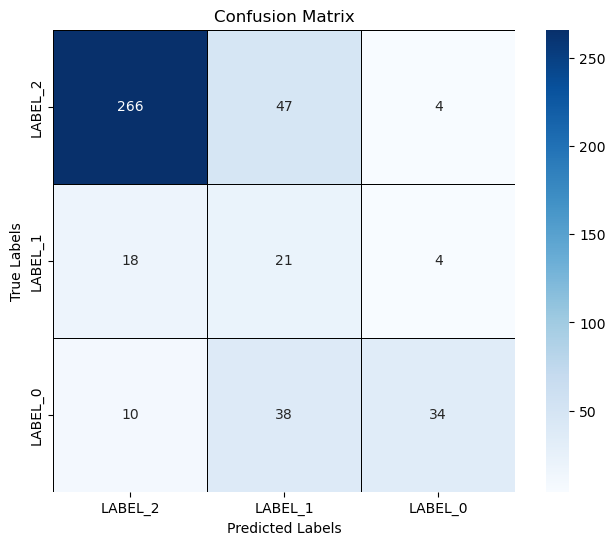

'Accuracy: 0.7262443438914027'

'Precision: 0.8183469323868879'

'Recall: 0.7262443438914027'

'F1-score: 0.7536236212540733'

In [154]:
from IPython.display import display
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

data = data.dropna(subset=['sentiment'])
cm = confusion_matrix(data['sentiment'], data['predicted_sentiment'], labels=["LABEL_2", "LABEL_1", "LABEL_0"])

cm_df = pd.DataFrame(cm, index=["LABEL_2", "LABEL_1", "LABEL_0"], columns=["LABEL_2", "LABEL_1", "LABEL_0"])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
            linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(data['sentiment'], data['predicted_sentiment'])
precision = precision_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
recall = recall_score(data['sentiment'], data['predicted_sentiment'], average='weighted')
f1 = f1_score(data['sentiment'], data['predicted_sentiment'], average='weighted')

# Display the confusion matrix and accuracy metrics

display(f"Accuracy: {accuracy}")
display(f"Precision: {precision}")
display(f"Recall: {recall}")
display(f"F1-score: {f1}")

In [ ]:
#Use DistilBert

In [155]:
#Redownload the dataset for this part because of NA values from last section
#An inefficient way to do this, but just to make things more convenient and ensures that the dataframe has the
#correct dimensions

data=pd.read_csv('trip_advisor_reviews_large.csv')
#data=pd.read_csv(r'movie_reviews_small.csv')

#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['review'].apply(lambda x: clean_doc(x))


#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['file_name'].tolist()

processed_text = data['processed_text'].tolist()

In [156]:
classifier2 = pipeline("sentiment-analysis")
classifier2(text)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9989442229270935},
 {'label': 'POSITIVE', 'score': 0.8657236099243164},
 {'label': 'POSITIVE', 'score': 0.9998189806938171},
 {'label': 'POSITIVE', 'score': 0.9865075349807739},
 {'label': 'POSITIVE', 'score': 0.9989442229270935},
 {'label': 'POSITIVE', 'score': 0.9989442229270935},
 {'label': 'POSITIVE', 'score': 0.999225378036499},
 {'label': 'POSITIVE', 'score': 0.9991341233253479},
 {'label': 'POSITIVE', 'score': 0.9989442229270935},
 {'label': 'POSITIVE', 'score': 0.9994814991950989},
 {'label': 'POSITIVE', 'score': 0.9989442229270935},
 {'label': 'NEGATIVE', 'score': 0.9578571319580078},
 {'label': 'POSITIVE', 'score': 0.9853910207748413},
 {'label': 'POSITIVE', 'score': 0.9989442229270935},
 {'label': 'POSITIVE', 'score': 0.9991341233253479},
 {'label': 'POSITIVE', 'score': 0.9977509379386902},
 {'label': 'POSITIVE', 'score': 0.9997130036354065},
 {'label': 'POSITIVE', 'score': 0.999225378036499},
 {'label': 'POSITIVE', 'score': 0.99948149919509

In [157]:
all=[]
for text in processed_text:
    all.append(" ".join(text))
results2=classifier2(all)

In [158]:
#Create a Sentiment column
def map_sentiment_distilbert(rating):
    if rating in [3,4,5]:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'

# Apply the function to create a new 'sentiment' column
data['sentiment2'] = data['rating'].apply(map_sentiment_distilbert)
data['predicted_sentiment2'] = [item['label'] for item in results2]

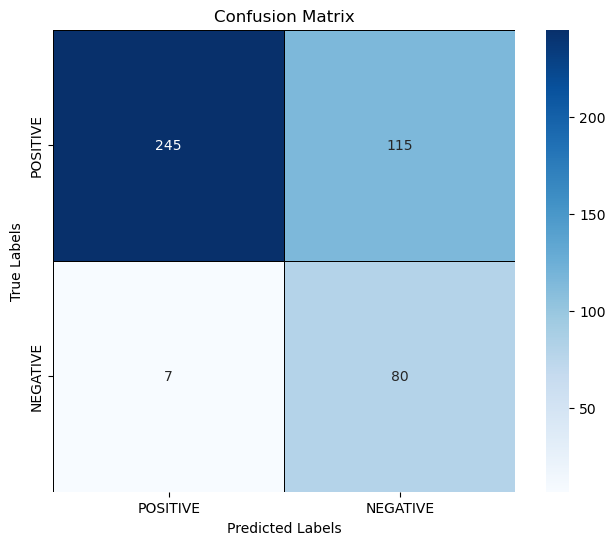

'Accuracy: 0.727069351230425'

'Precision: 0.8628463259335742'

'Specificity: 0.9195402298850575'

'Recall: 0.727069351230425'

'F1-score: 0.7552505508843549'

In [159]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TN / (TN + FP)

data = data.dropna(subset=['sentiment2'])
cm = confusion_matrix(data['sentiment2'], data['predicted_sentiment2'], labels=["POSITIVE","NEGATIVE"])

cm_df = pd.DataFrame(cm, index=["POSITIVE","NEGATIVE"], columns=["POSITIVE","NEGATIVE"])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
            linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(data['sentiment2'], data['predicted_sentiment2'])
precision = precision_score(data['sentiment2'], data['predicted_sentiment2'], average='weighted')
specificity = specificity_score(data['sentiment2'], data['predicted_sentiment2'])
recall = recall_score(data['sentiment2'], data['predicted_sentiment2'], average='weighted')
f1 = f1_score(data['sentiment2'], data['predicted_sentiment2'], average='weighted')

# Display the confusion matrix and accuracy metrics

display(f"Accuracy: {accuracy}")
display(f"Precision: {precision}")
display(f"Specificity: {specificity}")
display(f"Recall: {recall}")
display(f"F1-score: {f1}")